In [53]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from yellowbrick.classifier import ClassificationReport
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

parent_dir = os.path.dirname(os.getcwd())
os.chdir(parent_dir)

print(f'Working Directory: {parent_dir}')


from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from utils.utils import get_file_size_stats

Working Directory: /Users/chandrasekaransidha/personal


In [9]:
# Import Data

df_raw_movies = pd.read_csv('/Users/chandrasekaransidha/personal/sandbox/notebooks/data/rotten_tomatoes/rotten_tomatoes_movies.csv')
df_raw_reviews = pd.read_csv('/Users/chandrasekaransidha/personal/sandbox/notebooks/data/rotten_tomatoes/rotten_tomatoes_critic_reviews_50k.csv')

df_raw_reviews.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [70]:
df_raw_movies.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


/var/folders/6y/k8lhf01n6w55fgk1gsgpfpfw0000gn/T/ipykernel_8746/120524120.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = [f'{v.get_height()} ({v.get_height()/df_pivoted.sum(axis=1)[i]*100:.0f}%)' if v.get_height() > 0 else '' for i, v in enumerate(c)]
/var/folders/6y/k8lhf01n6w55fgk1gsgpfpfw0000gn/T/ipykernel_8746/120524120.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = [f'{v.get_height()} ({v.get_height()/df_pivoted.sum(axis=1)[i]*100:.0f}%)' if v.get_height() > 0 else '' for i, v in enumerate(c)]
/var/folders/6y/k8lhf01n6w55fgk1gsgpfpfw0000gn/T/ipykernel_8746/120524120.py:23: FutureWar

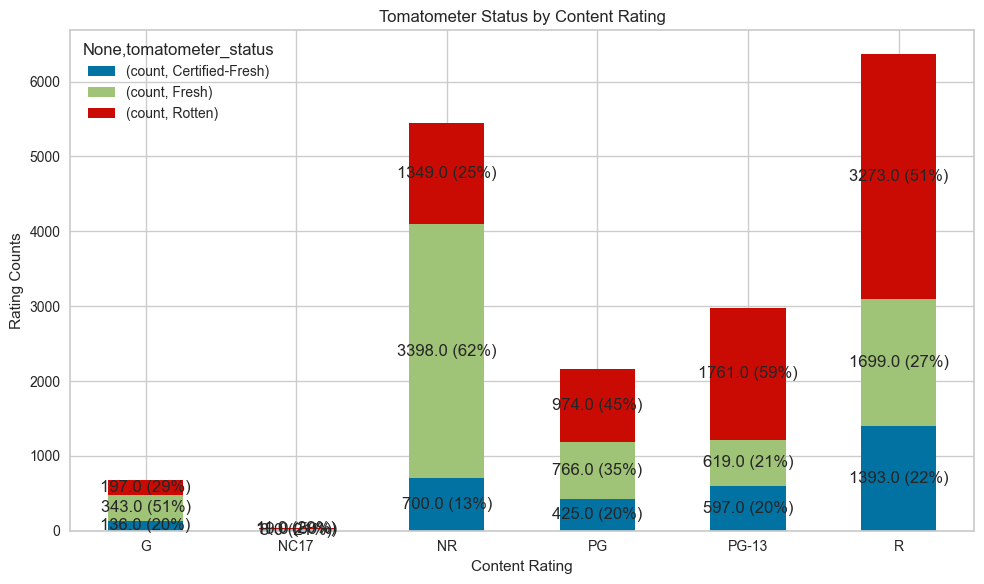

In [83]:
df_rating_status = df_raw_movies[["content_rating","tomatometer_status"]].value_counts().reset_index(name="count")


df_rating_total = df_raw_movies[["content_rating"]].value_counts().reset_index(name="total_count")

df_grouped = df_rating_status.merge(df_rating_total, on=["content_rating"])

df_grouped["status_pct"] = round((df_grouped["count"] / df_grouped["total_count"]) * 100,2)

df_grouped = df_grouped.sort_values(["total_count"], ascending=False)


df_pivoted = df_grouped.pivot_table(index=["content_rating"], columns=["tomatometer_status"],values=["count"])


# 6. Plotting
fig, ax = plt.subplots(figsize=(10, 6))
df_pivoted.plot(kind='bar', stacked=True, ax=ax)

# Adding labels for actual counts on bars
for c in ax.containers:
    # Optional: Format the label to show as 'count (percentage%)'
    labels = [f'{v.get_height()} ({v.get_height()/df_pivoted.sum(axis=1)[i]*100:.0f}%)' if v.get_height() > 0 else '' for i, v in enumerate(c)]
    ax.bar_label(c, labels=labels, label_type='center')

ax.set_title('Tomatometer Status by Content Rating')
ax.set_xlabel('Content Rating')
ax.set_ylabel('Rating Counts')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal for better readability
plt.tight_layout()
plt.show()


# df_rating_status = df_rating_status.sort_values(["content_rating","count"], ascending=[True,False])

# sns.barplot(data=df_rating_status, x="content_rating", y="count", hue="tomatometer_status")

# plt.show()

/var/folders/6y/k8lhf01n6w55fgk1gsgpfpfw0000gn/T/ipykernel_8746/4251872836.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = [f'{v.get_height()} ({v.get_height()/df_pivoted.sum(axis=1)[i]*100:.0f}%)' if v.get_height() > 0 else '' for i, v in enumerate(c)]
/var/folders/6y/k8lhf01n6w55fgk1gsgpfpfw0000gn/T/ipykernel_8746/4251872836.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = [f'{v.get_height()} ({v.get_height()/df_pivoted.sum(axis=1)[i]*100:.0f}%)' if v.get_height() > 0 else '' for i, v in enumerate(c)]
/var/folders/6y/k8lhf01n6w55fgk1gsgpfpfw0000gn/T/ipykernel_8746/4251872836.py:23: Future

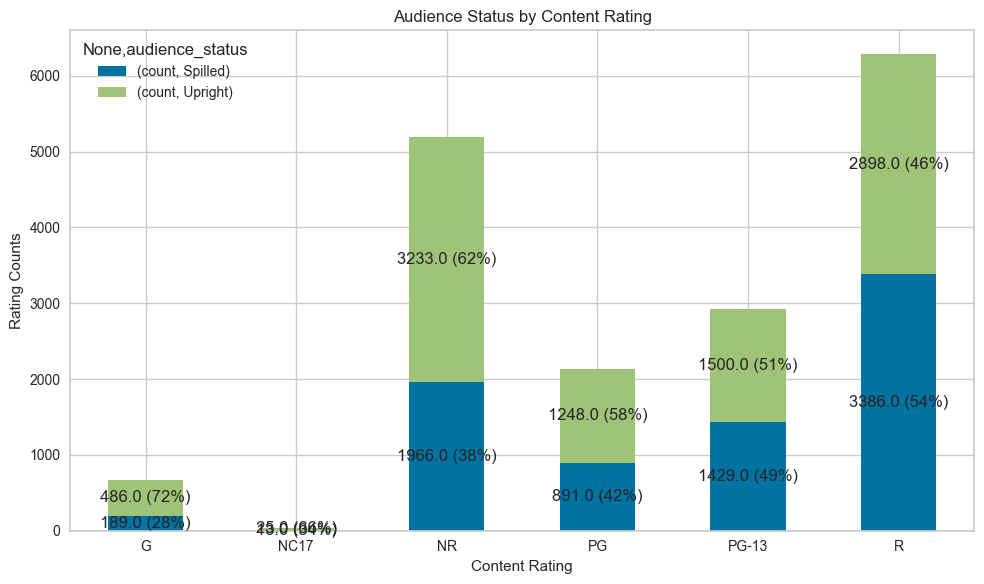

In [86]:
df_rating_status = df_raw_movies[["content_rating","audience_status"]].value_counts().reset_index(name="count")


df_rating_total = df_raw_movies[["content_rating"]].value_counts().reset_index(name="total_count")

df_grouped = df_rating_status.merge(df_rating_total, on=["content_rating"])

df_grouped["status_pct"] = round((df_grouped["count"] / df_grouped["total_count"]) * 100,2)

df_grouped = df_grouped.sort_values(["total_count"], ascending=False)


df_pivoted = df_grouped.pivot_table(index=["content_rating"], columns=["audience_status"],values=["count"])


# 6. Plotting
fig, ax = plt.subplots(figsize=(10, 6))
df_pivoted.plot(kind='bar', stacked=True, ax=ax)

# Adding labels for actual counts on bars
for c in ax.containers:
    # Optional: Format the label to show as 'count (percentage%)'
    labels = [f'{v.get_height()} ({v.get_height()/df_pivoted.sum(axis=1)[i]*100:.0f}%)' if v.get_height() > 0 else '' for i, v in enumerate(c)]
    ax.bar_label(c, labels=labels, label_type='center')

ax.set_title('Audience Status by Content Rating')
ax.set_xlabel('Content Rating')
ax.set_ylabel('Rating Counts')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal for better readability
plt.tight_layout()
plt.show()


# df_rating_status = df_rating_status.sort_values(["content_rating","count"], ascending=[True,False])

# sns.barplot(data=df_rating_status, x="content_rating", y="count", hue="tomatometer_status")

# plt.show()

What's the simplest model that I can build?

Does the production house have any impact on the rotten_status?   

Most consistent actors - Those with high pct of fresh movies of all they have featured in

Alignment between tomatometer status and audience rating



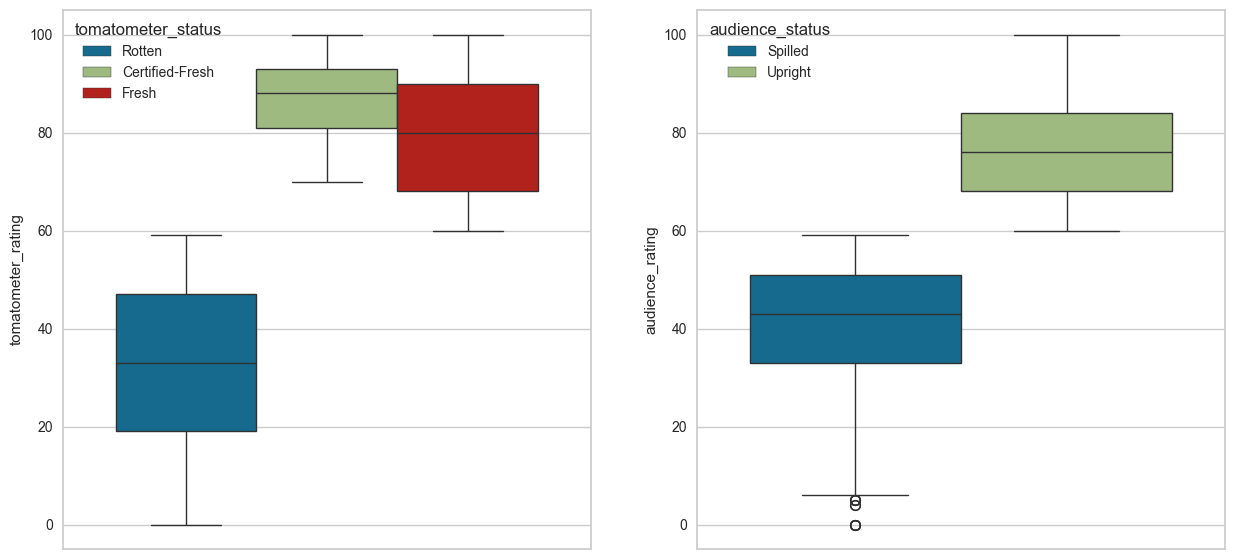

In [ ]:
# Plotting ratings by categories

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
plt.subplots_adjust(hspace=0.4)

sns.boxplot(data=df_raw_movies, y='tomatometer_rating', hue='tomatometer_status', ax=axis[0])
sns.boxplot(data=df_raw_movies, y='audience_rating', hue='audience_status', ax=axis[1])

plt.show()

In [ ]:

#Converting to parquet
df_raw_movies.to_parquet('./notebooks/data/rotten_tomatoes/rotten_tomatoes_movies.parquet', engine='pyarrow')
df_raw_reviews.to_parquet('./notebooks/data/rotten_tomatoes/rotten_tomatoes_critic_reviews_50k.parquet', engine='pyarrow')

#Reading from parquet
df_raw_movies = pd.read_parquet('./notebooks/data/rotten_tomatoes/rotten_tomatoes_movies.parquet')
df_raw_reviews = pd.read_parquet('./notebooks/data/rotten_tomatoes/rotten_tomatoes_critic_reviews_50k.parquet')


File size: 17098037 bytes
File size: 16697.30 KB
File size: 16.31 MB
File size: 0.02 GB


NameError: name 'df_raw_movies' is not defined

In [38]:
def process_data(df: pd.DataFrame,
                    num_columns_subset)->pd.DataFrame:
    """
    Process the predictor variables
    """
    # Drop Rows with na
    df=df.copy()
    df=df.dropna(subset=num_columns_subset) 

    return df


In [59]:
# Separating Categorical and Numerical Columns

cat_columns = ['content_rating','audience_status']
num_columns = ['tomatometer_count','audience_rating','audience_count','tomatometer_top_critics_count','tomatometer_fresh_critics_count','tomatometer_rotten_critics_count']

target_col = ['tomatometer_status']



In [60]:
print(df_raw_movies[num_columns].isnull().sum())

print(f'Dataframe prior to processing: {df_raw_movies.shape}')

tomatometer_count                    44
audience_rating                     296
audience_count                      297
tomatometer_top_critics_count         0
tomatometer_fresh_critics_count       0
tomatometer_rotten_critics_count      0
dtype: int64
Dataframe prior to processing: (17712, 22)


In [61]:
# Removing rows with NULLs
df_raw_movies_processed = process_data(df=df_raw_movies, num_columns_subset=num_columns+cat_columns)

print(df_raw_movies_processed[num_columns].isnull().sum())

df_movies_x = df_raw_movies_processed[num_columns + cat_columns]

df_movies_y = df_raw_movies_processed[target_col]

print(f'Dataframe post processing: {df_raw_movies_processed.shape}')

tomatometer_count                   0
audience_rating                     0
audience_count                      0
tomatometer_top_critics_count       0
tomatometer_fresh_critics_count     0
tomatometer_rotten_critics_count    0
dtype: int64
Dataframe post processing: (17254, 22)


In [62]:
# Create a ColumnTransformer to scale selected columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(sparse_output=False),cat_columns),
        ('num', StandardScaler(), num_columns)
    ], remainder="passthrough")

In [52]:
classifiers = [
    SGDClassifier(max_iter=500, tol=1e-3, random_state=2),
    KNeighborsClassifier(),
    LogisticRegression(solver="lbfgs", random_state=2),
    LogisticRegressionCV(cv=5, random_state=2),
    BaggingClassifier(random_state=2),
    ExtraTreesClassifier(n_estimators=500, random_state=2),
    RandomForestClassifier(n_estimators=500, random_state=2),
    GaussianNB()
]

In [65]:
# Base model

all_scores = []

for classifier in classifiers:
    # Create a pipeline that includes the preprocessor and the classifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    score = cross_val_score(estimator=pipeline, X=df_movies_x, y=df_movies_y, cv = 5, scoring='accuracy')
    all_scores.append( {
        'model_name': classifier.__class__.__name__,
        'accuracy': score.mean()
    })

df_model_scores = pd.DataFrame(all_scores)

df_model_scores

/Users/chandrasekaransidha/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chandrasekaransidha/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chandrasekaransidha/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chandrasekaransidha/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A colu

,model_name,f1 score
0,SGDClassifier,0.908022
1,KNeighborsClassifier,0.919903
2,LogisticRegression,0.948012
3,LogisticRegressionCV,0.959314
4,BaggingClassifier,0.986380
5,ExtraTreesClassifier,0.967949
6,RandomForestClassifier,0.978787
7,GaussianNB,0.703025


In [69]:
classifiers = [
    SGDClassifier(max_iter=500, tol=1e-3, random_state=2),
    KNeighborsClassifier(),
    LogisticRegression(solver="lbfgs", random_state=2),
    LogisticRegressionCV(cv=5, random_state=2),
    BaggingClassifier(random_state=2),
    ExtraTreesClassifier(n_estimators=500, random_state=2),
    RandomForestClassifier(n_estimators=500, random_state=2),
    GaussianNB()
]


all_scores = []

for classifier in classifiers:
    # Create a pipeline that includes the preprocessor and the classifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    score = cross_val_score(estimator=pipeline, X=df_movies_x, y=df_movies_y.values.ravel(), cv = 5, scoring='f1_macro')
    all_scores.append( {
        'model_name': classifier.__class__.__name__,
        'f1_score': score.mean()
    })

df_model_scores = pd.DataFrame(all_scores)

df_model_scores

,model_name,f1_score
0,SGDClassifier,0.898541
1,KNeighborsClassifier,0.920529
2,LogisticRegression,0.936536
3,LogisticRegressionCV,0.945747
4,BaggingClassifier,0.984000
5,ExtraTreesClassifier,0.965131
6,RandomForestClassifier,0.976329
7,GaussianNB,0.686634


In [106]:
# Feature importance

rf_model = RandomForestClassifier(n_estimators=500, random_state=2)

pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', rf_model)
    ])

score = cross_val_score(estimator=pipeline, X=df_movies_x, y=df_movies_y_mapped.values.ravel(), cv = 5, scoring='f1_macro')

print(f'F1 Score: {score.mean()}')

F1 Score: 0.9764054157118753


RandomForestClassifier(n_estimators=500, random_state=2)

                                  Feature  Importance
13  num__tomatometer_rotten_critics_count    0.298909
12   num__tomatometer_fresh_critics_count    0.269335
8                  num__tomatometer_count    0.144746
9                    num__audience_rating    0.085400
11     num__tomatometer_top_critics_count    0.061318
10                    num__audience_count    0.041620
6            cat__audience_status_Spilled    0.038290
7            cat__audience_status_Upright    0.033560
2                  cat__content_rating_NR    0.015533
4               cat__content_rating_PG-13    0.004398
5                   cat__content_rating_R    0.003899
3                  cat__content_rating_PG    0.001822
0                   cat__content_rating_G    0.001026
1                cat__content_rating_NC17    0.000145


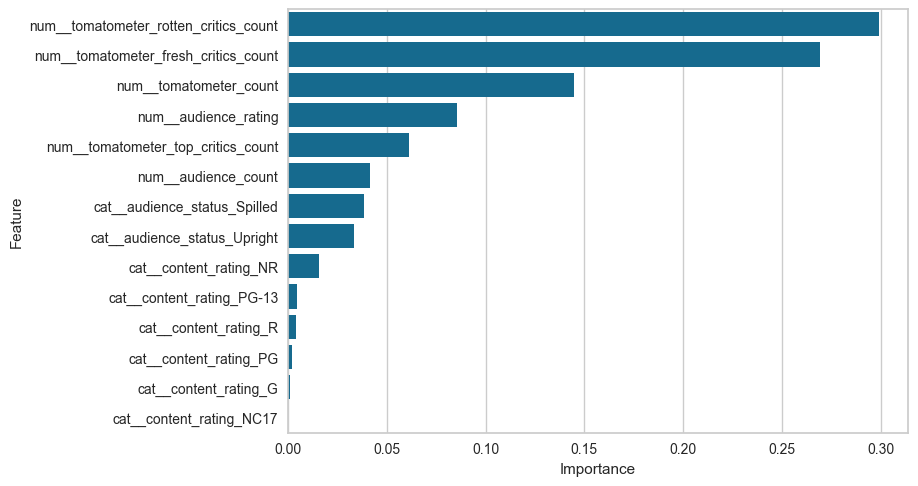

In [114]:
X_train, X_test, y_train, y_test = train_test_split(df_movies_x, df_movies_y_mapped.values.ravel(), test_size=0.2, random_state=2)

pipeline.fit(X_train, y_train)

# Extract the trained RandomForestClassifier
rf_model_trained = pipeline.named_steps['classifier']

feature_importances = rf_model_trained.feature_importances_

preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances_df)

sns.barplot(data=feature_importances_df, y="Feature", x="Importance")

plt.show()


In [31]:
df_raw_movies['tomatometer_status'].value_counts()

tomatometer_status
Rotten             7565
Fresh              6844
Certified-Fresh    3259
Name: count, dtype: int64

### Boosting Models

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

classifiers_boost = [
    AdaBoostClassifier(),
    CatBoostClassifier(silent=True),
    LGBMClassifier(),
    XGBClassifier(),
    GradientBoostingClassifier()
]


In [101]:
df_movies_y_mapped = df_movies_y.replace({'Rotten':0, 'Fresh':1,'Certified-Fresh':2})

df_movies_y_mapped

,tomatometer_status
0,0
1,2
2,1
3,2
4,1
...,...
17707,0
17708,2
17709,1
17710,1


In [103]:
# Create a ColumnTransformer to scale selected columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(sparse_output=False),cat_columns),
        ('num', StandardScaler(), num_columns)
    ], remainder="passthrough")

all_scores = []

for classifier in classifiers_boost:
    # Create a pipeline that includes the preprocessor and the classifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    score = cross_val_score(estimator=pipeline, X=df_movies_x, y=df_movies_y_mapped.values.ravel(), cv = 5, scoring='f1_macro')
    all_scores.append( {
        'model_name': classifier.__class__.__name__,
        'f1_score': score.mean()
    })

df_model_scores = pd.DataFrame(all_scores)

df_model_scores

/Users/chandrasekaransidha/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/chandrasekaransidha/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/chandrasekaransidha/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/chandrasekaransidha/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be r

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 13803, number of used features: 14
[LightGBM] [Info] Start training from score -0.841831
[LightGBM] [Info] Start training from score -0.957179
[LightGBM] [Info] Start training from score -1.686834
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1117
[LightGBM] [Info] Number of data points in the train set: 13803, number of used features: 14
[LightGBM] [Info] Start training from score -0.841663
[LightGBM] [Info] Start training from score -0.957179
[LightGBM] [Info] Start training from score -1.687225
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 sec

,model_name,f1_score
0,AdaBoostClassifier,0.805423
1,CatBoostClassifier,0.984641
2,LGBMClassifier,0.984997
3,XGBClassifier,0.983827
4,GradientBoostingClassifier,0.980355


In [104]:
# Create a ColumnTransformer to scale selected columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(sparse_output=False),cat_columns),
        ('num', StandardScaler(), num_columns)
    ], remainder="passthrough")

all_scores = []

for classifier in classifiers_boost:
    # Create a pipeline that includes the preprocessor and the classifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    score = cross_val_score(estimator=pipeline, X=df_movies_x, y=df_movies_y_mapped.values.ravel(), cv = 5, scoring='f1_macro')
    all_scores.append( {
        'model_name': classifier.__class__.__name__,
        'f1_score': score.mean()
    })

df_model_scores = pd.DataFrame(all_scores)

df_model_scores

/Users/chandrasekaransidha/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/chandrasekaransidha/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/chandrasekaransidha/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/chandrasekaransidha/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be r

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 13803, number of used features: 14
[LightGBM] [Info] Start training from score -0.841831
[LightGBM] [Info] Start training from score -0.957179
[LightGBM] [Info] Start training from score -1.686834
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1117
[LightGBM] [Info] Number of data points in the train set: 13803, number of used features: 14
[LightGBM] [Info] Start training from score -0.841663
[LightGBM] [Info] Start training from score -0.957179
[LightGBM] [Info] Start training from score -1.687225
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000281 sec

,model_name,f1_score
0,AdaBoostClassifier,0.805423
1,CatBoostClassifier,0.984641
2,LGBMClassifier,0.984997
3,XGBClassifier,0.983827
4,GradientBoostingClassifier,0.980355
